# K-Nearest Neighbors (KNN) - Complete Guide with Projects

## 🧠 Introduction to KNN
- K-Nearest Neighbors (KNN) is a simple, supervised machine learning algorithm used for both classification and regression.
- It stores all available data and classifies/predicts a new data point based on similarity (distance) to neighbors.

---

## 🚀 Intuition
- - "Birds of a feather flock together".
- - Given a new data point, find the 'K' closest training samples and let them vote (classification) or average (regression).

---

## 🧮 Math Behind KNN
- **Distance Calculation** (commonly used: Euclidean distance)
###  $$ \ [ d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + ...} \ ] $$
- No actual training phase. All the work happens during prediction.

---

## 📏 Distance Metrics
 - **Euclidean Distance**: Straight-line distance
 - **Manhattan Distance**: Distance along axes at right angles
 - **Minkowski Distance**: Generalization of Euclidean and Manhattan
 - **Hamming Distance**: For categorical variables

---

## ❓ How to Choose `K`
 - Small `K` = more sensitive to noise (overfitting)
 - Large `K` = more smooth, but may underfit
 - Common method: Try different values and use cross-validation

---

## 📊 Performance Metrics
 - **Classification**:
   - Accuracy
   - Confusion Matrix
   - Precision, Recall, F1-score
 - **Regression**:
   - Mean Squared Error (MSE)
   - R² Score (Coefficient of Determination)
---


Confusion Matrix:
 [[79 20]
 [28 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

Accuracy: 0.6883116883116883


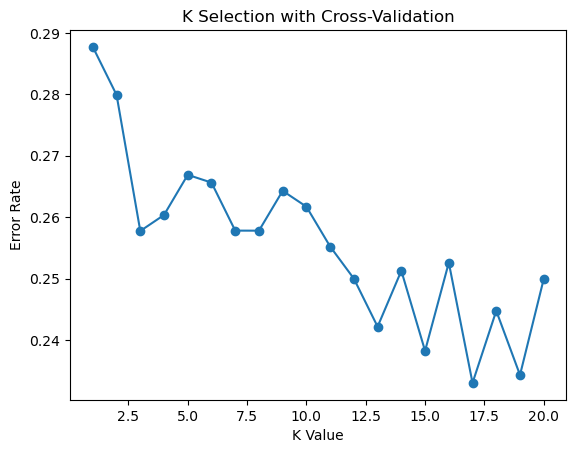

In [5]:
# ## 🔧 Implementation: KNN Classification on Diabetes Dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Load Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Tune K
error_rates = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    error_rates.append(1 - score.mean())

plt.plot(k_values, error_rates, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("K Selection with Cross-Validation")
plt.show()

# ---


## 🔍 Hyperparameter Tuning with GridSearchCV for KNN (Classification)

In [14]:
 ## 🔍 Hyperparameter Tuning with GridSearchCV for KNN (Classification)

from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN Classifier
param_grid_cls = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan and Euclidean distance
}

# Create GridSearchCV
grid_search_cls = GridSearchCV(KNeighborsClassifier(), param_grid_cls, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_cls.fit(X_scaled, y)

# Best parameters and score
print("Best Parameters (Classifier):", grid_search_cls.best_params_)
print("Best CV Accuracy:", grid_search_cls.best_score_)


Best Parameters (Classifier): {'n_neighbors': 19, 'p': 1, 'weights': 'distance'}
Best CV Accuracy: 0.7747984042101688
